<a href="https://colab.research.google.com/github/Jordan-mackey/INFO_5502_LABS/blob/main/lab_assignment_05_Jordan_Mackey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (07/29/2022 11:59'AM' - 08/02/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (50 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1)(10 points) Start by choosing a question you'd like a visualization to answer.

(2)(30 points) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3)(10 points) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [ ]:
# Your answer here (question + explanation):


# What is the age distribution like in the populations of 1900 & 2000?




Sex       int64
Year      int64
Age       int64
People    int64
dtype: object
    Sex  Year  Age    People
53    2  2000   35  11635647
    Sex  Year  Age  People
36    1  1900   90   15164
   Sex  Year  Age   People
0    1  1900    0  4619544
2    1  1900    5  4465783
4    1  1900   10  4057669
6    1  1900   15  3774846
8    1  1900   20  3694038
   Sex  Year  Age    People
1    1  2000    0   9735380
3    1  2000    5  10552146
5    1  2000   10  10563233
7    1  2000   15  10237419
9    1  2000   20   9731315
   Year  Age  people_m  people_f  age_totalpop
1  2000    0   9735380   9310714      19046094
3  2000    5  10552146  10069564      20621710
5  2000   10  10563233  10022524      20585757
7  2000   15  10237419   9692669      19930088
9  2000   20   9731315   9324244      19055559
   Year  Age  people_m  people_f  age_totalpop
0  1900    0   4619544   4589196       9208740
2  1900    5   4465783   4390483       8856266
4  1900   10   4057669   4001749       8059418
6  1900   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

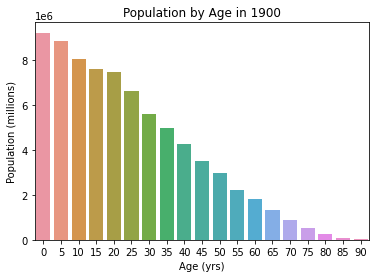

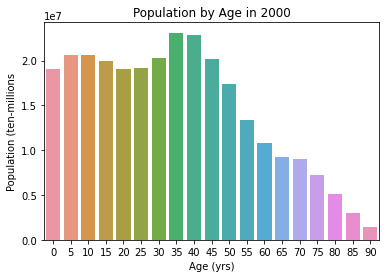

In [32]:
# Your answer here (python code + explanation):
import numpy as np
import pandas as pd
import requests 
import io
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_05_census.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

df.head()
print(df.dtypes)


# begin EDA & data cleaning/transforming
max_population = df['People'].max()
min_population = df['People'].min()

print(df[df['People'] == max_population])
print(df[df['People'] == min_population])

# obtain df with year 1900 only

df_1900 = df[df['Year'] == 1900]
print(df_1900.head())

# obtain df with year 2000 only
df_2000 = df[df['Year'] == 2000]
print(df_2000.head())

# separate m & f
df_1900_m = df_1900[df_1900['Sex'] == 1]
df_1900_f = df_1900[df_1900['Sex'] == 2]

df_2000_m = df_2000[df_2000['Sex'] == 1]
df_2000_f = df_2000[df_2000['Sex'] == 2]

# Change column to people_sex 1900
df_1900_m['people_m'] = df_1900_m['People']
df_1900_f['people_f'] = df_1900_f['People']

# create column for people_f
people_f = df_1900_f['people_f']

people_f = list(people_f)
people_f

df_1900_m['people_f'] = people_f
df_1900_m.head()

# make new df with no need for Sex & People columns
df2_1900 = df_1900_m.drop(['Sex', 'People'], axis = 1)
df2_1900.head()


# Change column to people_sex 2000
df_2000_m['people_m'] = df_2000_m['People']
df_2000_f['people_f'] = df_2000_f['People']

people_f2 = df_2000_f['people_f']

people_f2 = list(people_f2)
people_f2

df_2000_m['people_f'] = people_f2
df_2000_m.head()

df2_2000 = df_2000_m.drop(['Sex', 'People'], axis = 1)
df2_2000.head()

# Create a total_pop column for each age group adding m & f for final df's

df2_1900['age_totalpop'] = df2_1900['people_m'] + df2_1900['people_f']

df2_2000['age_totalpop'] = df2_2000['people_m'] + df2_2000['people_f']

print(df2_2000.head())
print(df2_1900.head())

# create visualizations
sns.barplot(x = 'Age', y = 'age_totalpop', data = df2_1900)
plt.xlabel('Age (yrs)')
plt.ylabel('Population (millions)')
plt.title('Population by Age in 1900')
plt.show()

sns.barplot(x = 'Age', y = 'age_totalpop', data = df2_2000)
plt.xlabel('Age (yrs)')
plt.ylabel('Population (ten-millions')
plt.title('Population by Age in 2000')
plt.show()

In [ ]:
# Your answer here (interpretation of the results):
#(3)(10 points) Provide a short write-up (no more than 3 paragraphs) describing your design.

# While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing 
# unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

# As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note 
# which aspects of the data might be obscured or down-played due to your visualization design.

# In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization 
# type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?


  To begin analyzing the given dataset, I first printed the data in its original form. This way, I was able to determine the given columns, records, and layout for the data. Upon inspecting the original data, I realized that lots of the records were redundant. Half of the records presented female and half male, with years alternating redundantly as well. In order to better analyze and understand the dataset, I came to the conclusion that the dataset would need to be reformatted and manipulated. 


  To reformat the data, I began by separating the dataset out into two separate dataframs - one for the year 1900 and another for the year 2000. Each dataframe still contained the same columns of information, just without the opposite dataframe's year representation. After separating the data for each year, I then decided that I needed to re-format the sex column. Since the sex column itself was not descriptive to the data (50% of the index points are 1 and 50% are 2 regardless of age, population, or year), I decided to create population columns indicative of sex by age. Once the transformation was finished, I had two dataframes with two new columns, 'people_f' for population for the corresponding age that is female, and 'people_m' for population for the corresponding age that is male. With this transformation, it would potentially be much easier to calculate totals, percentages, and to make more sense out of the representation of each sex within the population, regardless of age group. Since the sex column and 'People' column were no longer necessary, these columns were dropped entirely. Because my original data science question for the project did not take into account the sex, I created a total population by age column that added the female and male populations for each age group. This final population column was the variable to be used in the final visualization. Once all of this transformation was finished, the final product included two dataframes, one for 1900, and one for 2000, and each dataframe included columns 'Year', 'Age', 'people_m', 'people_f', and 'age_totalpop'. Now that each dataframe is representative of each year, they could be visualized and compared.

  The resulting visualization using Seaborn was a distribution of population across age groups between the years 1900 and 2000, plotted concurrently so that they are easy to compare.  The plots revealed that the age group with the greatest population in 1900 was the 0 age group (0-4 yrs), and the population for each subsequent age group steadily declined until the 90+ age group is nearly non-existent. This matches that the early EDA stated that the smallest population in the original dataset was the 90+ age group in 1900. The 2000 plot revealed that the most represented age group within this year was the age 35-40. Age groups 0-30 are relatively stable and well-represented. After the age group 35-40, however, the populations steadily decline similar to the way that they did in the 1900 chart. The 90+ age group within 2000 is also significantly larger than in 1900, suggesting a rising life-expectancy. 
  